***DATA620 Web Analytics Project One***

The CitiBike ridership data can be an interesting source for understanding commute via bicycles by citizens in New York. These bikes can be uplifted and dropped off at stations throughout the city. The CitiBike dataset contains among other variables, the following information: trip duration, start time, stop time, start station, end station, user tye and user gender. This project seeks to answer the following key question:

1. Within a random sample of this ridership network, which station is most significant?

(https://www.citibikenyc.com/system-data)

In [ ]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


**Load Data Set**

In [ ]:
bike_data = pd.read_csv("/Users/juanelle/Desktop/MSDS/Spring2020/DATA620/Project 1/201306-citibike-tripdata.csv")
#bike_data.head(5)
bike_data.shape


This dataset contains 577703 record. To answer the main questions in this project we will use just a random sample of 10000 record. We will also just keep five columns of interest, namely: start station name, end station name, tripduration, usertype and gender.

In [ ]:
bike_data = pd.read_csv("/Users/juanelle/Desktop/MSDS/Spring2020/DATA620/Project 1/201306-citibike-tripdata.csv")
bd_sub = bike_data[['start station name', 'end station name', 'tripduration','usertype','gender' ]].sample(10000)
bd_sub.dropna()#drop rows with missing values
bd_sub.head()

In [ ]:
bd_sub= bd_sub[bd_sub['usertype']=='Subscriber']# subset rows where usertype = Subscriber
bd_sub.head()


In [ ]:
bd_sub.to_csv('bike_data.csv')# write sampled data to file

In [ ]:
bd_sub = pd.read_csv("https://github.com/latoyagirl/DATA620-Web-Analytics/blob/master/bike_data.csv")

In [391]:
print(f"Number of rows: {bd_sub.shape[0]:,}") # number of rows count


Number of rows: 5,755


In [392]:
unique_start_station=bd_sub["start station name"].value_counts()#Count of the number of unique start stations
print(unique_start_station)

E 17 St & Broadway               59
Broadway & E 14 St               58
Broadway & E 22 St               56
Broadway & W 24 St               51
W 20 St & 11 Ave                 51
Lafayette St & E 8 St            49
E 24 St & Park Ave S             48
Carmine St & 6 Ave               46
W 13 St & 6 Ave                  42
Pershing Square North            41
8 Ave & W 33 St                  40
8 Ave & W 31 St N                40
Lawrence St & Willoughby St      38
9 Ave & W 14 St                  38
St Marks Pl & 2 Ave              38
Broadway & W 58 St               38
W 41 St & 8 Ave                  38
W 27 St & 7 Ave                  38
Pershing Square South            38
West St & Chambers St            37
W 4 St & 7 Ave S                 37
E 9 St & Avenue C                36
West Thames St                   36
Christopher St & Greenwich St    36
9 Ave & W 22 St                  36
E 11 St & 2 Ave                  35
W 43 St & 10 Ave                 34
E 13 St & Avenue A          

In this sample of 5756, Lafayette St & E 8 St  station seems to be the popular station from which most bike trips started since there are 99 occurences  in the start station column for this station. It will be interesting to findout if though it is significant in that most trips started from this station, what is its influence in the network. We can also consider the same question the the 2nd and 3rd top occuring start stations. These are: Broadway & W 24 St and Central Park S & 6 Ave.

In [393]:
unique_end_station=bd_sub["end station name"].value_counts()#Count of the number of unique start stations
print(unique_end_station)

E 17 St & Broadway                                76
W 20 St & 11 Ave                                  58
Broadway & E 14 St                                54
Broadway & W 24 St                                53
9 Ave & W 14 St                                   46
Pershing Square North                             44
University Pl & E 14 St                           40
Broadway & E 22 St                                40
Broadway & W 58 St                                39
8 Ave & W 31 St N                                 38
E 9 St & Avenue C                                 37
Carmine St & 6 Ave                                37
Lafayette St & E 8 St                             36
W 41 St & 8 Ave                                   36
E 58 St & 3 Ave                                   36
W 49 St & 8 Ave                                   35
W 17 St & 8 Ave                                   35
West Thames St                                    35
Greenwich St & Warren St                      

In the end station column, the station with the highest destination count was E 17 St & Broadway .This station also has the 6th highest count for start stations. W 20 St & 11 Ave  station had the 2nd highest destination count, followed by Broadway & E 14 St.  It is obvious that there may be stations where persons more often than not drop off bikes rather than pick up bikes. Further analysis of this can be used to inform strategic andlogistal infrastructural  work for the docking of bikes.

We will now proceed to build a network graph in order to  analyse the interconnections among the station in this sample.

In [ ]:
G = nx.from_pandas_edgelist(bd_sub, 'start station name', 'end station name', ['tripduration', 'gender'])

**Draw Graph**

In [ ]:
#Draw the graph
fig, ax = plt.subplots(figsize=(12, 13))
nx.draw_networkx(G,  ax=ax, node_size=5, node_color='red')

There is a large cluster of nodes in the  center of the graph.The graph on the outskirts are those that occur less than 10 times in the dataset as start or end stations. Further analysis of the graph will enable us to single out those specific graphs in the tigght cluster.

In [ ]:
density = nx.density(G)
print("Network density is :", density)

Network density is a measure of the proportion of possible ties which are actualized among the members of a network. The proprtion in this case is 0.14. This may indicate that on a large scale, there is no direct connection between some station via riders.

***Analysis of the Graph***

Below is some basic information about the graph. There are 337 nodes, 7551 edges and an average degree of 46

In [ ]:
nx.info(G) # Information about the graph

We will now calculate the diameter of the graph.This is the greatest distance between any pair of vertices. To find the diameter of a graph, first find the shortest path between each pair of vertices. The greatest length of any of these paths is the diameter of the graph. In this case the diameter of the graph is 5. 

In [ ]:
nx.diameter(G)# 

In [ ]:
#print(G.nodes()) # A list of all the nodes on the network


**Centrailty Measures**

The first centrality measure we will look at is Degree Centraility. It is by means of ths measure that we can answer our first question, which is, to which station is most of the other stations connected.

In [ ]:
deg = nx.degree(G)
#deg

*Top five stations with the least amount of connections*

In [ ]:
# minimum number of degress that exist in the graph for each node
deg_list=list(deg)
deg_list.sort(key=lambda no_edges:no_edges[1])
deg_list[0:4]


*Top  stations with the most connections.*

In [ ]:
# top ten most influential according to degree
deg_list=list(deg)
deg_list.sort(key=lambda no_edges:no_edges[1], reverse=True)
deg_list[1:11]

At index 0, there is Nan node (Not sure what it represents) which is to be investigated. Of interest is how connected the route Broadway is. Station W 20 St & 11 Ave is the second most end destination in the sample and according to our degree centrality measures it has the most connections to the other stations. Broadway & W 24 St station was the second most used start station and our degree centrality measures indicate that it is connected to some other 117 stations. Hence we can conclude that a start station of significance is Broadway & W 24 St and  a end station of significance is W 20 St & 11 Ave.

*Plot of these  degrees values to guage their distribution*

In [ ]:
import matplotlib.pyplot as plot
degree_values = dict(deg).values()
h=plot.hist(degree_values,100)


The histogram helps us to visualise how the degrees of the different nodes on the network is distributed. Every node is connected to at least one other node. There is also an outlier in the distribution whic is the nan node.

In [ ]:

plot.loglog(h[1][1:],h[0])

**Closeness Centrality**

We will now look at the closeness centrality measures of the nodes in the  network.

In [ ]:
c_c=nx.closeness_centrality(G) # dict of closeness measures
df= pd.DataFrame(list(c_c.items()), columns=['node', 'Closeness'])
top= df.nlargest(10, ['Closeness'])
print(top) 
bottom= df.nsmallest(10, ['Closeness'])
print(bottom) 

Closeness centrality is a measure of the average shortest distance from each vertex to each other vertex. Usually the graph with the lowest centrality measure has a more central importance or is the node that is closer to every other node on the network than any other node. In this case station DeKalb Ave & Skillman St is the most central. 

**Betweeness Centrality**

We will now look at the top ten and bottom ten betweeness centrality measures of the nodes in the network.

In [ ]:
c_b=nx.betweenness_centrality(G) # dict of closeness measures
df1= pd.DataFrame(list(c_b.items()), columns=['node', 'Betweeness'])
top1= df1.nlargest(10,['Betweeness'])
print(top1)
bottom1= df1.nsmallest(10, ['Betweeness'])
print(bottom1) 

Betweeness centrality is a measure of how often a given vertex lies on the shortest path between two other vertices. This can be thought of as a kind of “bridge” score, a measure of how much removing a node would disrupt the connections between other nodes in the network. Here again, station W 20 St & 11 Ave seems critical in this  sample network.

**Eigenvector Centrality**

We will now look at the eigenvector centrality measures of the nodes in the network.

In [ ]:
c_e=nx.eigenvector_centrality(G) # dict of closeness measures
df2= pd.DataFrame(list(c_e.items()), columns=['node', 'eigenvalue'])
top= df2.nlargest(10, ['eigenvalue'])
print(top) 
bottom2= df2.nsmallest(10, ['eigenvalue'])
print(bottom2) 

Eigenvector centrality is a measure of the influence a node has on a network. A high eigenvector score means that a node is connected to many nodes who themselves have high scores. In this case that node is station W 20 St & 11 Ave.

**Conclusions**

Based on the sample of the citibike dataset used in this project. Station W 20 St & 11 Ave seems to be a station that is most significant among the other stations. This ststion has the most destinations in this sample. According to  the various centrality measures investigated in this project, when compared with other stations, Station W 20 St & 11 is station with the most connection and also the most 'influential'. 'Influential' in the sense that maybe it is the most strategically located station. An investigation into they type of structures around this station might give indication as to why it is the lead end station for many other stations. 

**Ego graph**

Returns induced subgraph of neighbors centered at node n within a given radius.

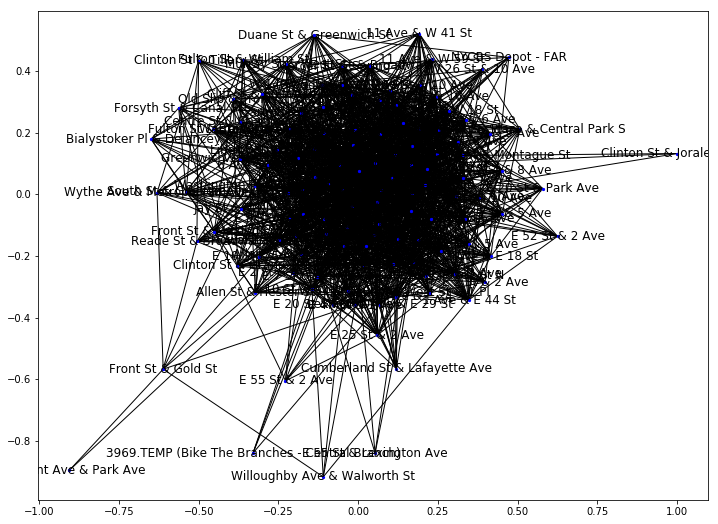

In [390]:
fig, ax = plt.subplots(figsize=(12, 9))
nx.draw_networkx(nx.ego_graph(G, 'W 20 St & 11 Ave', radius=1,center=True),  ax=ax, node_size=5, node_color='blue')